# <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">classification des commentaires d’un ensemble de commentaires </p>

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Information sur le dataset</p>



Grand ensemble de données sur les critiques de films

Il s'agit d'un ensemble de données pour la classification contenant beaucoup de données. Un ensemble de 50 000 critiques de films très polaires qui sont étiquétées. Il y’a également des données supplémentaires non étiquetées à utiliser. Des formats de texte brut et de sac de mots déjà traités sont fournis. Voir le fichier README contenu dans la version pour plus de détails.

------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------

L'ensemble de données de base contient 50 000 avis répartis uniformément en 25 000 trains et un ensembles 25 000 données de test. 

La répartition globale des labels est équilibrée (25 000 pos et 25 000 neg).

Il est inclus également 50 000 autres données sans étiquette pour un apprentissage non supervisé.

<a href="https://ai.stanford.edu/~amaas/data/sentiment/">Pour d’autre details</a>

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Utilisation</p>


### J’utiliserai ses donnees de la manière suivantes :
#### [ Je vais rassembler le 25 000 données de test et le 50 000 données suplementaires sans leurs étiquéttes pour résoudre un problème comme celui-ci ]


##  Problème : Proposer une catégorisation du niveau de satisfaction à partir des commentaires sur des films.


# <!doctype html>
## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">SOMMAIRE</p>

# Importation des packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">EXPLORATION DES DONNEES</p>

In [2]:
file=open('aclImdb/train/neg/0_3.txt','r')
file.read()


"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [3]:
dir_path1 = 'aclImdb/train/neg/'


dir_path2 = 'aclImdb/train/pos/'


dir_path3= 'aclImdb/train//unsup/'


-----------------------------------------------------------------------------

In [1]:
# dir_filename = os.listdir(dir_path1)

# dir_filename2 = os.listdir(dir_path2)

# dir_filename3 = os.listdir(dir_path3)


In [2]:
# def recupe(dir_path):
#     MYliste=[]
#     for e in dir_filename :
#         ouvert=open('aclImdb/train//neg/'+e,'r', encoding='utf-8')
#         MYliste.append(ouvert.read())
#         ouvert.close()
#     return MYliste


In [3]:
# neg = recup(dir_path1)

In [4]:
# len(neg)

In [5]:
# def recupe2(dir_path):
#     MYliste=[]
#     for e in dir_filename2 :
#         ouvert=open('aclImdb/train//pos/'+e,'r', encoding='utf-8')
#         MYliste.append(ouvert.read())
#         ouvert.close()
#     return MYliste

In [6]:
# pos = recupe2(dir_path2)

In [7]:
# len(pos)

In [8]:
# def recupe3(dir_path):
#     MYliste=[]
#     for e in dir_filename3 :
#         ouvert=open('aclImdb/train//unsup/'+e,'r', encoding='utf-8')
#         MYliste.append(ouvert.read())
#         ouvert.close()
#     return MYliste

In [9]:
# uns = recupe3(dir_path3)

In [10]:
# len(uns)

----------------------------------------

### Chargement des données

In [4]:
def recuperer(dir_path1,dir_path2,dir_path3):
    l1 = []
    l2 = []
    l3 = []
    import os
    dir_filenames1 = os.listdir(dir_path1)
    dir_filenames2 = os.listdir(dir_path2)
    dir_filenames3 = os.listdir(dir_path3)
    for e in dir_filenames1 :
        ouvert=open(dir_path1 + e,'r', encoding='utf-8')
        l1.append(ouvert.read())
        ouvert.close()
    for e in dir_filenames2 :
        ouvert=open(dir_path2 + e,'r', encoding='utf-8')
        l2.append(ouvert.read())
        ouvert.close()
    for e in dir_filenames3 :
        ouvert=open(dir_path3 + e,'r', encoding='utf-8')
        l3.append(ouvert.read())
        ouvert.close()
    return l1 + l2 + l3

In [5]:
donnees_train = recuperer(dir_path1,dir_path2,dir_path3)  # 520 seconde pour finir le chargement

In [6]:
# donnees_train[0]
len(donnees_train)

75000

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Preprossessing</p>

-----------------------------------

## Bag-of-words model Comment sa marche

Le modèle du sac de mots est une représentation simplificatrice utilisée dans le traitement du langage naturel et la recherche d'informations (IR). Dans ce modèle, un texte (comme une phrase ou un document) est représenté comme le sac (multiset) de ses mots, sans tenir compte de la grammaire et même de l'ordre des mots mais en gardant la multiplicité . Le modèle du sac de mots a également été utilisé pour la vision par ordinateur .

Le modèle de sac de mots est couramment utilisé dans les méthodes de classification de documents où la (fréquence de) l'occurrence de chaque mot est utilisée comme caractéristique pour former un classificateur .

<p><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">Une première référence au "sac de mots" dans un contexte linguistique peut être trouvée dans </font><font style="vertical-align: inherit;">l'article de 1954 de </font></font><a href="/wiki/Zellig_Harris" title="Zellig Harris"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">Zellig Harris sur la </font></font></a><font style="vertical-align: inherit;"></font><i><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">structure distributionnelle</font></font></i><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> . </font></font>
</p>
<p><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">Le modèle Bag-of-words est un exemple de </font></font><a href="/wiki/Vector_space_model" title="Modèle d'espace vectoriel"><font style="vertical-align: inherit;"><font style="vertical-align: inherit;">modèle d'espace vectoriel</font></font></a><font style="vertical-align: inherit;"><font style="vertical-align: inherit;"> .
</font></font></p>

#### Exemple

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [8]:
# Exemple 2: deux mots deux mots
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


-----------------------------------------

 -----------------------------------------

# Application

In [9]:
X_train = donnees_train
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(75000, 124255)

-------------------------

-------------------------

## TF-IDF
Le TF-IDF (de l'anglais term frequency-inverse document frequency) est une méthode de pondération souvent utilisée en recherche d'information et en particulier dans la fouille de textes. Cette mesure statistique permet d'évaluer l'importance d'un terme contenu dans un document, relativement à une collection ou un corpus. Le poids augmente proportionnellement au nombre d'occurrences du mot dans le document. Il varie également en fonction de la fréquence du mot dans le corpus. Des variantes de la formule originale sont souvent utilisées dans des moteurs de recherche pour apprécier la pertinence d'un document en fonction des critères de recherche de l'utilisateur.

### Fréquence du terme
La fréquence « brute » d'un terme est simplement le nombre d'occurrences de ce terme dans le document considéré (on parle de « fréquence » par abus de langage). On peut choisir cette fréquence brute pour exprimer la fréquence d'un terme.

Des variantes ont été proposées. Un choix plus simple, dit « binaire », est de mettre 1 si le terme apparaît dans le document et 0 sinon. À l'opposé, on peut normaliser logarithmiquement la fréquence brute pour amortir les écarts. Une normalisation courante pour prendre en compte la longueur du document est de normaliser par la fréquence brute maximale du document.

<center>
    <img src="image1.png">
</center>

### Fréquence inverse de document
La fréquence inverse de document (inverse document frequency) est une mesure de l'importance du terme dans l'ensemble du corpus. Dans le schéma TF-IDF, elle vise à donner un poids plus important aux termes les moins fréquents, considérés comme plus discriminants. Elle consiste à calculer le logarithme (en base 10 ou en base 2) de l'inverse de la proportion de documents du corpus qui contiennent le terme :


<center>
    <img src="image2.png">
</center>
<center>
    <img src="image3.png">
</center>

<a href = "https://fr.wikipedia.org/wiki/TF-IDF"> Lien vers un exemple explicite sur wikipédia</a>


---------------------------------------------

---------------------------------------------

# Application


In [10]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(75000, 124255)

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Le model</p>

# Le model KMeans clustering

## Une méthode très intéressante
### Methode elbow
Cette méthode nous permet de trouver le nombres de groupe optimal

Enfait il nous donne une idée du choi du nombre de groupe, mais c’est à nous de prendre notre chois en fonction de nos besoin

In [11]:
# Elbow_M = KElbowVisualizer(KMeans(), k=8)
# Elbow_M.fit(X_train_tfidf)                   # 1135 seconde
# Elbow_M.show()

Avec la methode elbow on a trouvé que le nombre de classe optimale est de 4

In [12]:
kmeans = KMeans(n_clusters = 4)
kmeans 

KMeans(n_clusters=4)

In [13]:
Model=kmeans.fit(X_train_tfidf)
pred = Model.predict(X_train_tfidf)

In [14]:
pca = TruncatedSVD(3)
pca.fit(X_train_tfidf)
PCA_ds = pd.DataFrame(pca.transform(X_train_tfidf), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,75000.0,0.330478,0.089175,0.034231,0.268901,0.327611,0.388468,0.701807
col2,75000.0,-0.002925,0.084152,-0.161767,-0.065944,-0.025603,0.043219,0.668320
col3,75000.0,0.001095,0.079113,-0.240335,-0.055429,-0.005833,0.050295,0.418173


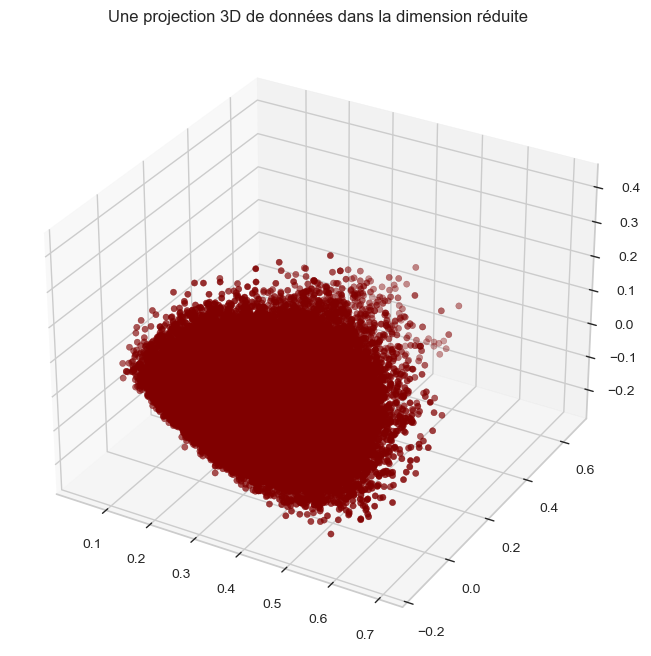

scipy.sparse._csr.csr_matrix

In [15]:
# Une projection 3D de données dans la dimension réduite
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(PCA_ds["col1"],PCA_ds["col2"],PCA_ds["col3"], c="maroon", marker="o" )
ax.set_title("Une projection 3D de données dans la dimension réduite")
plt.show()
type(X_train_tfidf)

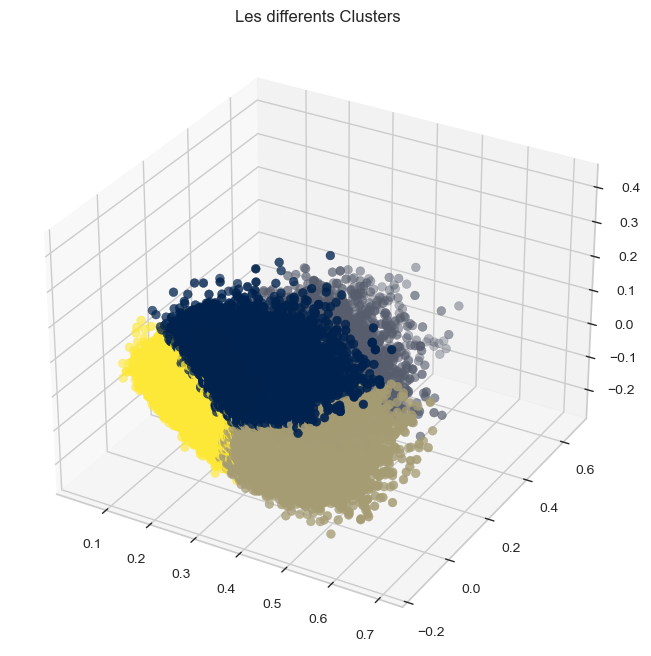

In [16]:
PCA_ds["Clusters"]= pred
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(PCA_ds["col1"],PCA_ds["col2"],PCA_ds["col3"], s=40, c=PCA_ds["Clusters"], marker='o', cmap ='cividis') #names = list(data.keys())
ax.set_title("Les differents Clusters")
plt.show()

In [17]:
# dir(pred)
# pred['tofile']
# dir(PCA_ds)
# PCA_ds.transform

In [19]:
PCA_ds["Clusters"] # Pour identifier l’index de mes differens clusters

0        3
1        2
2        2
3        0
4        2
        ..
74995    1
74996    0
74997    0
74998    0
74999    3
Name: Clusters, Length: 75000, dtype: int32

Donc on poura identifié chaque commentaire par son index pour determiner dans quel cluster il appartient

In [20]:
labels = Model.labels_
cluster_center=Model.cluster_centers_

In [21]:
cluster_center

array([[5.07370848e-04, 6.32162868e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.33493032e-04, 8.54893637e-04, 0.00000000e+00, ...,
        0.00000000e+00, 6.68139252e-06, 0.00000000e+00],
       [2.88048859e-04, 9.51400175e-04, 2.51675593e-06, ...,
        4.08133994e-06, 0.00000000e+00, 0.00000000e+00],
       [2.05423635e-04, 5.68903328e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.88640988e-06]])

In [22]:
labels

array([3, 2, 2, ..., 0, 0, 3])

In [23]:
df = pd.DataFrame(donnees_train)

In [24]:
df.set_axis(["Commentaire"], axis='columns', inplace=True)

In [25]:
df["Cluster"] = Model.labels_

In [26]:
df

,Commentaire,Cluster
0,Story of a man who has unnatural feelings for ...,3
1,Airport '77 starts as a brand new luxury 747 p...,2
2,This film lacked something I couldn't put my f...,2
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,2
...,...,...
74995,"Delightfully awful! Made by David Giancola, a ...",1
74996,"Watching Time Chasers, it obvious that it was ...",0
74997,At the beginning we can see members of Troma t...,0
74998,"The movie was incredible, ever since I saw it ...",0


In [27]:
# df.sort_values(by = 'Cluster')

In [28]:
df[df["Cluster"] == 1]

,Commentaire,Cluster
9,The film is bad. There is no other way to say ...,1
12,Plot is not worth discussion even if it hints ...,1
13,This film is about a male escort getting invol...,1
15,A worn-out plot of a man who takes the rap for...,1
21,Kareena Kapoor in a bikini hmmmmmmmm.<br /><br...,1
...,...,...
74970,This is without a doubt the worst movie I have...,1
74984,I feel badly for the actors and directors of t...,1
74988,"This is a really dumb movie, with a very low b...",1
74991,Think of this one as Back to the Future...exce...,1


In [29]:
df.loc[0][0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

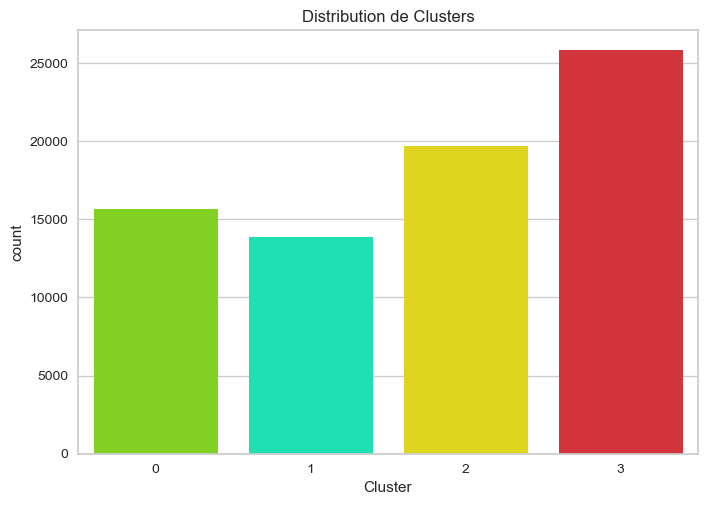

In [30]:
pal = ["#86ee08","#00ffc3", "#fff200","#ec1c24"]
pl = sns.countplot(x=df["Cluster"], palette= pal)
pl.set_title("Distribution de Clusters")
plt.show()

## <p style="background-color:#709699;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">Exploration de different clusters</p>

In [64]:
Cluster_0 = df[df["Cluster"] == 0]
Cluster_1 = df[df["Cluster"] == 1]
Cluster_2 = df[df["Cluster"] == 2]
Cluster_3 = df[df["Cluster"] == 3]

In [65]:
print(f"Le nombre de ligne du cluster \n 0 est : {len(Cluster_0)},\n 1 est : {len(Cluster_1)},\n 2 est : {len(Cluster_2)},\n 3 est : {len(Cluster_3)}")

Le nombre de ligne du cluster 
 0 est : 15643,
 1 est : 13844,
 2 est : 19703,
 3 est : 25810


In [66]:
Cluster_0['idx'] = list(range(15643))
Cluster_1['idx'] = list(range(13844))
Cluster_2['idx'] = list(range(19703))
Cluster_3['idx'] = list(range(25810))

C:\Users\Abdoulaye MAIGA\AppData\Local\Temp\ipykernel_14672\385361859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_0['idx'] = list(range(15643))
C:\Users\Abdoulaye MAIGA\AppData\Local\Temp\ipykernel_14672\385361859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cluster_1['idx'] = list(range(13844))
C:\Users\Abdoulaye MAIGA\AppData\Local\Temp\ipykernel_14672\385361859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [67]:
Cluster_0.set_index("idx", inplace =True )
Cluster_1.set_index("idx", inplace =True )
Cluster_2.set_index("idx", inplace =True )
Cluster_3.set_index("idx", inplace =True )

## Pour avoir acces à un element "i" de l’un de cluster "j" il vous suffit de d’executer :
* Cluster_j[i][0]

## Le cluster 0

In [56]:
Cluster_0.loc[0][0]

'Sorry everyone,,, I know this is supposed to be an "art" film,, but wow, they should have handed out guns at the screening so people could blow their brains out and not watch. Although the scene design and photographic direction was excellent, this story is too painful to watch. The absence of a sound track was brutal. The loooonnnnng shots were too long. How long can you watch two people just sitting there and talking? Especially when the dialogue is two people complaining. I really had a hard time just getting through this film. The performances were excellent, but how much of that dark, sombre, uninspired, stuff can you take? The only thing i liked was Maureen Stapleton and her red dress and dancing scene. Otherwise this was a ripoff of Bergman. And i\'m no fan f his either. I think anyone who says they enjoyed 1 1/2 hours of this is,, well, lying.'

Désolé tout le monde, je sais que c'est censé être un film "artistique", mais wow, ils auraient dû distribuer des armes à feu à la projection pour que les gens puissent se faire sauter la cervelle et ne pas regarder. Bien que la conception des scènes et la direction photographique soient excellentes, cette histoire est trop douloureuse à regarder. L'absence de bande sonore était brutale. Les longs plans étaient trop longs. Combien de temps peut-on regarder deux personnes qui restent assises à discuter ? Surtout quand le dialogue est celui de deux personnes qui se plaignent. J'ai vraiment eu du mal à aller au bout de ce film. Les performances étaient excellentes, mais combien de ces trucs sombres, sans inspiration, pouvez-vous supporter ? La seule chose que j'ai aimée, c'est Maureen Stapleton, sa robe rouge et sa scène de danse. Sinon, c'était une imitation de Bergman. Et je ne suis pas fan de lui non plus. Je pense que quiconque dit qu'il a apprécié 1h30 de ça, eh bien, il ment.

Traduit avec www.DeepL.com/Translator (version gratuite)

In [58]:
Cluster_0.loc[1][0]

"I don't know who to blame, the timid writers or the clueless director. It seemed to be one of those movies where so much was paid to the stars (Angie, Charlie, Denise, Rosanna and Jon) that there wasn't enough left to really make a movie. This could have been very entertaining, but there was a veil of timidity, even cowardice, that hung over each scene. Since it got an R rating anyway why was the ubiquitous bubble bath scene shot with a 70-year-old woman and not Angie Harmon? Why does Sheen sleepwalk through potentially hot relationships WITH TWO OF THE MOST BEAUTIFUL AND SEXY ACTRESSES in the world? If they were only looking for laughs why not cast Whoopi Goldberg and Judy Tenuta instead? This was so predictable I was surprised to find that the director wasn't a five year old. What a waste, not just for the viewers but for the actors as well."

"Je ne sais pas qui blâmer, les auteurs timides ou le réalisateur désemparé. On dirait que c'est l'un de ces films où l'on a tellement donné aux stars (Angie, Charlie, Denise, Rosanna et Jon) qu'il n'en restait pas assez pour faire vraiment un film. Cela aurait pu être très divertissant, mais il y avait un voile de timidité, voire de lâcheté, qui planait sur chaque scène. Puisque le film est classé R, pourquoi l'omniprésente scène du bain moussant a-t-elle été tournée avec une femme de 70 ans et non avec Angie Harmon ? Pourquoi Sheen traverse-t-il en dormant des relations potentiellement torrides avec deux des actrices les plus belles et les plus sexy du monde ? S'ils ne cherchaient qu'à rire, pourquoi ne pas avoir choisi Whoopi Goldberg et Judy Tenuta à la place ? C'était tellement prévisible que j'ai été surpris de voir que le réalisateur n'était pas un enfant de cinq ans. Quel gâchis, non seulement pour les téléspectateurs mais aussi pour les acteurs."

Traduit avec www.DeepL.com/Translator (version gratuite)

In [93]:
Cluster_0.loc[4][0]

'I saw this movie at a drive-in in 1959. Until "Howard the Duck" I considered this the worst movie I had ever seen. This movie tried to combine all the genera in one; comedy, horror, teenage angst, and the hot rod that must have sired "My Mother, The Car." Maybe it deserves a second viewing to see if it is an accurate reflection of it\'s time.'

J'ai vu ce film dans un drive-in en 1959. Jusqu'à "Howard the Duck", je considérais ce film comme le pire que j'avais jamais vu. Ce film essayait de combiner tous les genres en un : comédie, horreur, angoisse adolescente, et le hot rod qui a dû engendrer "Ma mère, la voiture". Il mérite peut-être un second visionnage pour voir s'il est un reflet exact de son époque.

## Le cluster 1

In [68]:
Cluster_1.loc[0][0]

'The film is bad. There is no other way to say it. The story is weak and outdated, especially for this country. I don\'t think most people know what a "walker" is or will really care. I felt as if I was watching a movie from the 70\'s. The subject was just not believable for the year 2007, even being set in DC. I think this rang true for everyone else who watched it too as the applause were low and quick at the end. Most didn\'t stay for the Q&A either.<br /><br />I don\'t think Schrader really thought the film out ahead of time. Many of the scenes seemed to be cut short as if they were never finished or he just didn\'t know how to finish them. He jumped from one scene to the next and you had to try and figure out or guess what was going on. I really didn\'t get Woody\'s (Carter) private life or boyfriend either. What were all the "artistic" male bondage and torture pictures (from Iraq prisons) about? What was he thinking? I think it was his very poor attempt at trying to create this d

"Le film est mauvais. Il n'y a pas d'autre moyen de le dire. L'histoire est faible et dépassée, surtout pour ce pays. Je ne pense pas que la plupart des gens sachent ce qu'est un "marcheur" ou s'en soucieront vraiment. si j'étais regarder un film des années 70. Le sujet n'était tout simplement pas crédible pour l'année 2007, même s'il se déroulait à DC Je pense que cela sonnait vrai pour tous ceux qui l'ont regardé aussi car les applaudissements étaient faibles et rapides à la fin. La plupart ne sont pas non plus restés pour les questions-réponses.<br /><br />Je ne pense pas que Schrader ait vraiment pensé au film à l'avance.Beaucoup de scènes semblaient être écourtées comme si elles n'étaient jamais terminées ou il ne savait tout simplement pas comment les terminer. Il sautait d'une scène à l'autre et vous deviez essayer de comprendre ou de deviner ce qui se passait. Je n'ai vraiment pas compris Woody (Carter) vie privée ou petit ami non plus. À quoi servaient toutes les images "artistiques" de bondage masculin et de torture (des prisons irakiennes) ? À quoi pensait-il ? Je pense que c'était sa très mauvaise tentative d'essayer de créer ce d ark vie de sous-culture privée pour le personnage de Woody (Car). Harrelson. Il a joué son personnage (Car) parfaitement. Vous avez vraiment eu une bonne idée de ce à quoi pouvait ressembler un "marcheur" (disons il y a vingt ans). Il était génial et ne sera probablement jamais reconnu pour ça. /><br />Quant à Lauren, Lily et Kristin... Ennuyeux.<br /><br />Ne le vois pas !

In [69]:
Cluster_1.loc[1][0]

'Plot is not worth discussion even if it hints at corruption, murder, power and the rest of thriller related topics. Characters are interesting though sometimes. Not realistic but interesting nevertheless.<br /><br />Development is slow like tea drinking ceremony. Visuals not stunning, but good enough to ease the eye strain. Good movie to watch after dinner before going to bed - nothing shocking too much, nothing overexciting. Movie sitcom style.<br /><br />I liked Woody - excellent performance. Had to fight the plot inadequacy and did the job pretty good. The rest are bearable though very predictable. The whole is watchable and better than most TV shows.'

"L'intrigue ne vaut pas la peine d'être discutée même si elle fait allusion à la corruption, au meurtre, au pouvoir et au reste des sujets liés aux thrillers. Les personnages sont parfois intéressants. Pas réalistes mais néanmoins intéressants.<br /><br />Le développement est lent comme boire du thé Visuels pas époustouflants, mais assez bons pour soulager la fatigue oculaire. Bon film à regarder après le dîner avant d'aller au lit - rien de trop choquant, rien de trop excitant. Style de sitcom de film.<br /><br />J'ai aimé Woody - Excellente performance . J'ai dû lutter contre l'insuffisance de l'intrigue et j'ai plutôt bien fait le travail. Le reste est supportable bien que très prévisible. L'ensemble est regardable et meilleur que la plupart des émissions de télévision.


In [70]:
Cluster_1.loc[2][0]

'This film is about a male escort getting involved in a murder investigation that happened in the circle of powerful men\'s wives.<br /><br />I thought "The Walker" would be thrilling and engaging, but I was so wrong. The pacing is painfully and excruciatingly slow, that even after 40 minutes of the film nothing happens much. Seriously, the first hour could be condensed into ten minutes. That\'s how slow it is.<br /><br />The fact that it lacks any thrills or action scenes aggravates the boredom. It\'s almost shocking that even argument scenes are so plain and devoid of emotion. Maybe it is because of the stiff upper lip of the higher social class? <br /><br />It\'s sad that "The Walker" becomes such a boring mess, despite such a strong cast. Blame it on the poor plot and even worse pacing.'

"Ce film raconte l'histoire d'une escorte masculine impliquée dans une enquête pour meurtre qui s'est déroulée dans le cercle des épouses d'hommes puissants.<br /><br />Je pensais que "The Walker" serait passionnant et engageant, mais j'étais tellement faux. Le rythme est douloureusement et atrocement lent, que même après 40 minutes de film il ne se passe plus rien. Sérieusement, la première heure pourrait être condensée en dix minutes. /> Le fait qu'il manque de sensations fortes ou de scènes d'action aggrave l'ennui . C\'est presque choquant que même les scènes de dispute soient si simples et dépourvues d\'émotion. Peut-être est-ce à cause de la lèvre supérieure raide de la classe sociale supérieure ? br /><br />C\'est triste que "The Walker " devient un gâchis si ennuyeux, malgré une distribution aussi forte. La faute à la mauvaise intrigue et au rythme encore pire. '

#### Dans ce cluster 1 
* Je constate les mécontentement vis-à-vis concernant les differents films dont il s’agit

## Le cluster 2

In [72]:
Cluster_2.loc[1][0]

"This film lacked something I couldn't put my finger on at first: charisma on the part of the leading actress. This inevitably translated to lack of chemistry when she shared the screen with her leading man. Even the romantic scenes came across as being merely the actors at play. It could very well have been the director who miscalculated what he needed from the actors. I just don't know.<br /><br />But could it have been the screenplay? Just exactly who was the chef in love with? He seemed more enamored of his culinary skills and restaurant, and ultimately of himself and his youthful exploits, than of anybody or anything else. He never convinced me he was in love with the princess.<br /><br />I was disappointed in this movie. But, don't forget it was nominated for an Oscar, so judge for yourself."

"Ce film manquait de quelque chose que je n'arrivais pas à mettre le doigt au début : le charisme de la part de l'actrice principale. Cela s'est inévitablement traduit par un manque d'alchimie lorsqu'elle partageait l'écran avec son homme principal. Même les scènes romantiques apparaissaient comme étant simplement les acteurs en jeu. Il se peut très bien que ce soit le réalisateur qui ait mal calculé ce qu'il attendait des acteurs. Je ne sais pas.<br /><br />Mais cela aurait-il pu être le scénario ? le chef amoureux Il semblait plus amoureux de ses talents culinaires et de son restaurant, et finalement de lui-même et de ses exploits de jeunesse, que de n'importe qui ou de quoi que ce soit d'autre. br /> J'ai été déçu par ce film. Mais n'oubliez pas qu'il a été nominé pour un Oscar, alors jugez par vous-même."

In [79]:
Cluster_2.loc[71][0]

"The premise is amazing and the some of the acting, notably Sally Kellerman and Anthony Rapp, is charming... but this film is near unwatchable. The music sounds as if it comes from some sort of the royalty free online site and the lyrics as if they were written with a rhyming dictionary open on the lap. Most of the singing is off-key. I think they may have filmed with the singing accapella and put in the music under it... The dialogue is really stupid and trite. The movie works best when it is actually talking about the real estate but unfortunately it strays to often into stupid farcical sub-plots. I found myself checking my watch after ther first twenty minutes and after 40 wondering 'when is it ever going to end.'"

"Le principe est incroyable et certains acteurs, notamment Sally Kellerman et Anthony Rapp, sont charmants... mais ce film est presque impossible à regarder. La musique semble provenir d'une sorte de site en ligne libre de droits et les paroles semblent avoir été écrites avec un dictionnaire de rimes ouvert sur les genoux. La plupart des chants sont faux. Je pense qu'ils ont peut-être filmé avec le chant accapella et mis la musique en dessous... Le dialogue est vraiment stupide et banal. Le film fonctionne mieux quand il parle réellement de l'immobilier, mais malheureusement il s'égare trop souvent dans des sous-intrigues stupides et farfelues. Je me suis retrouvé à regarder ma montre après les vingt premières minutes et après 40 minutes en me demandant 'quand est-ce que ça va finir'".

In [86]:
Cluster_2.loc[5111][0]

"Scott is right. The best 2 person sword duel ever put on film is in the middle of this movie. The sword fights with multiple fighters are not the best although quite good. However, the fight in the middle is the best even compared to Japanese samurai movies. Chinese swordplay scenes in my opinion have never surpassed the Japanese in terms of entertainment value. Especially in scenes where one guy must battle a group of enemies, Japanese movies excel, example being the Lone Wolf and Cub series. Even though duels in Japanese cinema last only seconds or a minute at the most, the sheer intensity of those moments made them better. But, this is one example where Chinese swordplay surpasses the Japanese. The scene in the middle of this film was a five minute long fight with the most amazing choreography ever. The other fights in this movie are good too but even if they sucked this movie would get a 7 for that one scene. If you haven't seen it, you have to. John Woo is the man."

"Scott a raison. Le meilleur duel à l'épée à deux jamais filmé se trouve au milieu de ce film. Les combats à l'épée avec plusieurs combattants ne sont pas les meilleurs, bien qu'ils soient assez bons. Cependant, le combat du milieu est le meilleur, même comparé aux films de samouraïs japonais. À mon avis, les scènes de combat à l'épée chinoises n'ont jamais surpassé les japonaises en termes de valeur de divertissement. Les films japonais excellent surtout dans les scènes où un seul homme doit combattre un groupe d'ennemis, comme dans la série Lone Wolf and Cub. Même si les duels dans le cinéma japonais ne durent que quelques secondes ou une minute tout au plus, l'intensité même de ces moments les rendait meilleurs. Mais voici un exemple où le jeu de sabre chinois surpasse le jeu japonais. La scène du milieu du film est un combat de cinq minutes avec la chorégraphie la plus incroyable qui soit. Les autres combats de ce film sont bons aussi, mais même s'ils étaient nuls, ce film obtiendrait un 7 pour cette seule scène. Si vous ne l'avez pas vu, vous devez le faire. John Woo est le meilleur."

## Le cluster 3

In [88]:
Cluster_3.loc[0][0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."


"L'histoire d'un homme qui éprouve des sentiments contre nature pour un cochon. Commence par une scène d'ouverture qui est un formidable exemple de comédie absurde. Le public d'un orchestre officiel est transformé en une foule violente et démente par les chants fous de ses chanteurs. Malheureusement, le film reste absurde tout le temps, sans narration générale, ce qui le rend tout à fait déplaisant. Même ceux de l'époque devraient être rebutés. Le dialogue cryptique ferait paraître Shakespeare facile à un élève de troisième année. D'un point de vue technique, le film est meilleur qu'on pourrait le croire, avec une bonne photographie réalisée par le futur grand Vilmos Zsigmond. On aperçoit brièvement les futures stars Sally Kirkland et Frederic Forrest."

In [89]:
Cluster_3.loc[1][0]

'"It appears that many critics find the idea of a Woody Allen drama unpalatable." And for good reason: they are unbearably wooden and pretentious imitations of Bergman. And let\'s not kid ourselves: critics were mostly supportive of Allen\'s Bergman pretensions, Allen\'s whining accusations to the contrary notwithstanding. What I don\'t get is this: why was Allen generally applauded for his originality in imitating Bergman, but the contemporaneous Brian DePalma was excoriated for "ripping off" Hitchcock in his suspense/horror films? In Robin Wood\'s view, it\'s a strange form of cultural snobbery. I would have to agree with that.'

''Il semble que de nombreux critiques trouvent l'idée d'un drame de Woody Allen peu appétissante.'' Et pour cause : il s'agit d'insupportables imitations boisées et prétentieuses de Bergman. Et ne nous voilons pas la face : les critiques ont majoritairement soutenu les prétentions bergmaniennes d'Allen, malgré les accusations pleurnichardes d'Allen qui prétendent le contraire. Ce que je ne comprends pas, c'est pourquoi Allen a été généralement applaudi pour son originalité dans l'imitation de Bergman, alors que le même Brian DePalma était excorié pour avoir "copié" Hitchcock dans ses films de suspense/horreur ? D'après Robin Wood, c'est une étrange forme de snobisme culturel. Je dois être d'accord avec cela.

In [90]:
Cluster_3.loc[2][0]

'This film is mediocre at best. Angie Harmon is as funny as a bag of hammers. Her bitchy demeanor from "Law and Order" carries over in a failed attempt at comedy. Charlie Sheen is the only one to come out unscathed in this horrible anti-comedy. The only positive thing to come out of this mess is Charlie and Denise\'s marriage. Hopefully that effort produces better results.'

Ce film est au mieux médiocre. Angie Harmon est aussi drôle qu'un sac de marteaux. Son comportement de garce dans "Law and Order" se retrouve dans cette tentative ratée de comédie. Charlie Sheen est le seul à sortir indemne de cette horrible anti-comédie. La seule chose positive qui ressort de ce gâchis est le mariage de Charlie et Denise. Espérons que cet effort produise de meilleurs résultats.

# En conclusion 
* On constate que les differents commentaires comporte deja beaucoup de carractere speciaux (/<>|\...)
* Donc le fait qu’on a demandé à la machine de determiner notre dictionnaire etait une mauvaise idées
* Pour avoir des résultat plus pertinent il nous faut utilisé notre propre dictionnaire ou de bien renetoyer nos données d’entrainement

Consernent la difference qui s’y trouve entre les elements de chaque cluster, on le lesse au lecteur qui s’y connais bien les données et ses differents film pour conclure